In [ ]:
#analisis de sentimientos en reclamaciones:
# datasets download: https://files.consumerfinance.gov/ccdb/complaints.csv.zip

In [1]:
#configuración en google colab de spark y pyspark
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!wget -q https://files.consumerfinance.gov/ccdb/complaints.csv.zip
!!unzip complaints.csv.zip

['Archive:  complaints.csv.zip', '  inflating: complaints.csv          ']

In [3]:
#exploración de datos:
import pandas as pd
df = pd.read_csv('complaints.csv')
df = df[pd.notnull(df['Consumer complaint narrative'])]
df.head()

<ipython-input-3-11ed8a2b87ea>:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('complaints.csv')


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
7,2023-02-04,"Credit reporting, credit repair services, or o...",Credit reporting,Improper use of your report,Reporting company used your report improperly,In accordance with the Fair Credit Reporting a...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",NV,89523.0,NaN,Consent provided,Web,2023-02-04,Closed with non-monetary relief,Yes,NaN,6526478
9,2023-02-05,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,This company is still reporting on an account ...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IN,46341.0,NaN,Consent provided,Web,2023-02-05,Closed with non-monetary relief,Yes,NaN,6523656
28,2023-02-02,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,"ON XX/XX/2022, MY XX/XX/2022 RECORDED CALL FRO...",Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AR,71913.0,NaN,Consent provided,Web,2023-02-02,Closed with non-monetary relief,Yes,NaN,6532044
37,2023-02-02,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account information incorrect,XXXX/ XXXX credit card balance was incorrectl...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",MO,63138.0,NaN,Consent provided,Web,2023-02-02,Closed with non-monetary relief,Yes,NaN,6520988
38,2023-02-02,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,My credit report contains a significant number...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",MI,48224.0,NaN,Consent provided,Web,2023-02-02,Closed with non-monetary relief,Yes,NaN,6520845


In [4]:
df.count()

Date received                   1240728
Product                         1240728
Sub-product                     1188521
Issue                           1240728
Sub-issue                       1037409
Consumer complaint narrative    1240728
Company public response          627488
Company                         1240728
State                           1235808
ZIP code                        1235470
Tags                             179031
Consumer consent provided?      1240728
Submitted via                   1240728
Date sent to company            1240728
Company response to consumer    1240726
Timely response?                1240728
Consumer disputed?               164054
Complaint ID                    1240728
dtype: int64

In [5]:
from io import StringIO
col = ['Product', 'Consumer complaint narrative']
df = df[col]
df = df[pd.notnull(df['Consumer complaint narrative'])]
df.columns = ['Product', 'Consumer_complaint_narrative']
df['category_id'] = df['Product'].factorize()[0]
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
df.head()

,Product,Consumer_complaint_narrative,category_id
7,"Credit reporting, credit repair services, or o...",In accordance with the Fair Credit Reporting a...,0
9,"Credit reporting, credit repair services, or o...",This company is still reporting on an account ...,0
28,"Credit reporting, credit repair services, or o...","ON XX/XX/2022, MY XX/XX/2022 RECORDED CALL FRO...",0
37,"Credit reporting, credit repair services, or o...",XXXX/ XXXX credit card balance was incorrectl...,0
38,"Credit reporting, credit repair services, or o...",My credit report contains a significant number...,0


In [6]:
df = df.head(1000)

In [7]:
df

,Product,Consumer_complaint_narrative,category_id
7,"Credit reporting, credit repair services, or o...",In accordance with the Fair Credit Reporting a...,0
9,"Credit reporting, credit repair services, or o...",This company is still reporting on an account ...,0
28,"Credit reporting, credit repair services, or o...","ON XX/XX/2022, MY XX/XX/2022 RECORDED CALL FRO...",0
37,"Credit reporting, credit repair services, or o...",XXXX/ XXXX credit card balance was incorrectl...,0
38,"Credit reporting, credit repair services, or o...",My credit report contains a significant number...,0
...,...,...,...
4129,"Credit reporting, credit repair services, or o...","Greetings, at the end of my current lease of a...",0
4134,"Credit reporting, credit repair services, or o...",I spoke to an Equifax representative today XXX...,0
4135,"Credit reporting, credit repair services, or o...",I started the dispute process with this compan...,0
4136,"Credit reporting, credit repair services, or o...",After reviewing my equifax account I realized ...,0


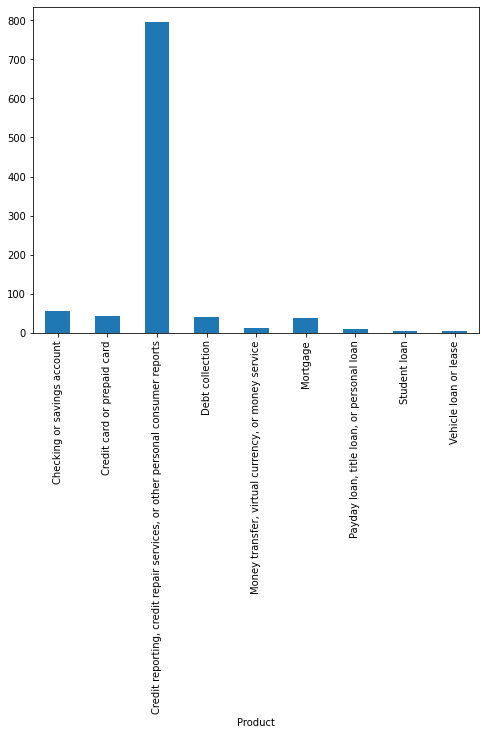

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [9]:
df.groupby('Product').Consumer_complaint_narrative.count()

Product
Checking or savings account                                                      56
Credit card or prepaid card                                                      42
Credit reporting, credit repair services, or other personal consumer reports    795
Debt collection                                                                  41
Money transfer, virtual currency, or money service                               12
Mortgage                                                                         37
Payday loan, title loan, or personal loan                                         9
Student loan                                                                      4
Vehicle loan or lease                                                             4
Name: Consumer_complaint_narrative, dtype: int64

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()
labels = df.category_id
features.shape

(1000, 3736)

In [11]:
features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09256154, 0.        , 0.21360041, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [13]:
from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Bank account or service':
  . Most correlated unigrams:
. double
. doubts
  . Most correlated bigrams:
. does include
. youre claiming
# 'Checking or savings account':
  . Most correlated unigrams:
. funds
. bank
  . Most correlated bigrams:
. debit card
. money account
# 'Consumer Loan':
  . Most correlated unigrams:
. double
. doubts
  . Most correlated bigrams:
. does include
. youre claiming
# 'Credit card':
  . Most correlated unigrams:
. double
. doubts
  . Most correlated bigrams:
. does include
. youre claiming
# 'Credit card or prepaid card':
  . Most correlated unigrams:
. charged
. card
  . Most correlated bigrams:
. account 15
. deleted account
# 'Credit reporting':
  . Most correlated unigrams:
. double
. doubts
  . Most correlated bigrams:
. does include
. youre claiming
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Most correlated unigrams:
. wells
. fargo
  . Most correlated bigrams:
. bank america
. wells fargo
# 'Debt collect

In [14]:
# Naive Bayes Classifier: the one most suitable for word counts is the multinomial variant:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB

count_vect = CountVectorizer()

X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)

In [15]:
X_train.count()

750

In [16]:
X_test

4126    I am a natural person, I am a living human bei...
3832    I am continually being called on the telephone...
1395    Yesterday morning, XX/XX/2022, I tried to proc...
2628    As of XX/XX/2022, before and after I have subm...
3095    XXXX, Transunion, XXXX heretofore ( XXXX ) has...
                              ...                        
2297    I opened an secured credit card account XX/XX/...
1690    On XX/XX/2022, I sent a letter regarding inacc...
28      ON XX/XX/2022, MY XX/XX/2022 RECORDED CALL FRO...
2360    I discovered that some of the information on m...
3176    Again, I was a victim of identity theft and th...
Name: Consumer_complaint_narrative, Length: 250, dtype: object

In [17]:
y_train.count()

750

In [18]:
y_test.count()

250

In [19]:
#Term Frecuency - TF
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

In [20]:
print(X_train_counts)

  (0, 4217)	13
  (0, 1841)	1
  (0, 4623)	19
  (0, 1292)	1
  (0, 4013)	1
  (0, 4410)	1
  (0, 2831)	6
  (0, 2194)	1
  (0, 2816)	1
  (0, 4564)	1
  (0, 733)	2
  (0, 1485)	2
  (0, 1554)	2
  (0, 727)	3
  (0, 1243)	3
  (0, 881)	2
  (0, 3580)	1
  (0, 2781)	1
  (0, 2961)	1
  (0, 2519)	2
  (0, 3100)	4
  (0, 2183)	1
  (0, 4149)	5
  (0, 4514)	3
  (0, 4154)	1
  :	:
  (749, 3567)	1
  (749, 605)	1
  (749, 3661)	1
  (749, 1512)	2
  (749, 3722)	2
  (749, 4101)	1
  (749, 884)	1
  (749, 2229)	1
  (749, 2044)	1
  (749, 2350)	1
  (749, 332)	1
  (749, 1708)	1
  (749, 1520)	1
  (749, 961)	3
  (749, 398)	1
  (749, 3780)	3
  (749, 4080)	1
  (749, 4591)	1
  (749, 3695)	1
  (749, 3849)	1
  (749, 986)	1
  (749, 2412)	3
  (749, 1319)	1
  (749, 1019)	1
  (749, 660)	1


In [21]:
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [22]:
print(X_train_tfidf)

  (0, 4623)	0.2973362069275181
  (0, 4622)	0.05819782094980658
  (0, 4606)	0.04251365316713803
  (0, 4576)	0.0426816682444575
  (0, 4564)	0.03782350680772678
  (0, 4552)	0.029269508165508173
  (0, 4514)	0.0717025604982413
  (0, 4410)	0.09435736701639547
  (0, 4402)	0.04998468489278709
  (0, 4388)	0.13609451007634546
  (0, 4307)	0.08491725400901992
  (0, 4296)	0.05577125588154392
  (0, 4278)	0.05841550629298417
  (0, 4218)	0.05499280377049939
  (0, 4217)	0.19593960677871317
  (0, 4193)	0.045936355689622795
  (0, 4178)	0.020624688132237067
  (0, 4166)	0.05602628040712698
  (0, 4155)	0.0720366536626942
  (0, 4154)	0.04266582462980844
  (0, 4151)	0.04461597425972843
  (0, 4149)	0.09404944445971485
  (0, 4042)	0.08883525490451076
  (0, 4013)	0.09435736701639547
  (0, 3964)	0.0532215836572849
  :	:
  (749, 1290)	0.04686231787345597
  (749, 1190)	0.08170749015259894
  (749, 1151)	0.06399488346984833
  (749, 1019)	0.10639825254314954
  (749, 986)	0.10639825254314954
  (749, 961)	0.307771344564

In [23]:
y_train.count()

750

In [24]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [25]:
print(clf)

MultinomialNB()


In [26]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [27]:
# Naive Bayes Classifier: the one most suitable for word counts is the multinomial variant:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.naive_bayes import MultinomialNB

import pickle

X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)

count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

pickle.dump(clf,open("file.model","wb"))

#clf = pickle.load(open("file.model", 'rb'))
#result = clf.score(X_test, Y_test)


In [28]:
#After fitting the training set, let’s make some predictions.
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [29]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all \n the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [30]:
# evaluar con el conjunto de testing

x_test
y_test

for each x_test:
    salida[] = clf.predict(count_vect.transfor(x_test[]))

evaluación????

    comparar (salida, y_test), precicin, recall, f1-score????, 80% ?????

SyntaxError: ignored